# Loan Default Prediction 
SuperLender is a local digital lending company. SuperLender wants to build machine learning model to lower the risk of loan default and deliver profitable and high-impact loan alternative. Now, try to predict if a loan was good or bad. This is binary classification business problem, where Good is 1 and Bad is 0.
Source : https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction

We are not given the relative impact of false negatives (versus other outcomes). You are free to make your own assumptions. 



#Columns, Description 

## **a) Demographic data (traindemographics.csv)**
- **customerid** (Primary key used to merge to other data)
- **birthdate** (date of birth of the customer)
- **bank_account_type** (type of primary bank account)
- **longitude_gps**
- **latitude_gps**
- **bank_name_clients** (name of the bank)
- **bank_branch_clients** (location of the branch - not compulsory - so missing in a lot of the cases)
- **employment_status_clients** (type of employment that customer has)
- **level_of_education_clients** (highest level of education)

## **b) Performance data (trainperf.csv)**
- **customerid** (Primary key used to merge to other data)
-**systemloanid** (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- **loannumber** (The number of the loan that you have to predict)
- **approveddate** (Date that loan was approved)
- **creationdate** (Date that loan application was created)
- **loanamount** (Loan value taken)
- **totaldue** (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees)
- **termdays** (Term of loan)
- **referredby** (customerId of the customer that referred this person - is missing, then not referred)
- **good_bad_flag** (good = settled loan on time; bad = did not settled loan on time) - this is the target variable that we need to predict


# Instruction 
Using the data, and code from the M4 classification Python notebooks, and other resources, as appropriate:

* Formulate a business problem that can be solved by classifiers, identify appropriate metrics to evaluate the suitability of a classifier solution for the business problem, stage a horse race of classifiers for the business problem, documenting your results, and determine if the classification results offer an appropriate solution to the business problem.

* Summarize your findings and an action items in a few sentences at the end of the notebook (in a section titled “Conclusion”). Be sure to offer the Bottom Line Up Front (BLUF) at the start of the Conclusion.

* Submit your notebook file on Blackboard, double checking that you have submitted the correct file.

Download the **"traindemographics.csv"** and **"trainperf.csv"** dataset from the source. 

**Source** : https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data
Start the hackathon by running the code below. 

When you read the csv files from the google drive, locate the files under the given names. These two files will be merged. 
- **file_1** is **"trainperf.csv"**
- **file_2** is **"traindemographics.csv"**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
import seaborn as sns
from datetime import datetime

In [ ]:
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# XGBoost
from xgboost import XGBClassifier

In [ ]:
# LightGBM
#!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# **Read Dataset**

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read two files 
file_1 = "/content/drive/MyDrive/Hackathon/M4/trainperf.csv"   # adapt this as needed to the file structure on your Google drive
df1 = pd.read_csv(file_1) # read in csv file

file_2= "/content/drive/MyDrive/Hackathon/M4/traindemographics.csv"   
df2 = pd.read_csv(file_2) # read in csv file

In [ ]:
# Merge two files using inner join
result = pd.merge(df1, df2, how='inner', on='customerid')

# **EDA**

In [ ]:
result.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


In [ ]:
# customer ID and System ID are deleted, as they don't add information to the model
# bank_branch_clients is deleted to reduce the # of features after encoding
# loannumber, approveddate, creationdate, and referredby are deleted, as they don't add much value 
result = result.drop(columns=['customerid', 'systemloanid','bank_branch_clients','loannumber','approveddate','creationdate','referredby'])

In [ ]:
# Shape of df
print("Shape", result.shape)

# Check data types
print(result.info())

Shape (3277, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loanamount                  3277 non-null   float64
 1   totaldue                    3277 non-null   float64
 2   termdays                    3277 non-null   int64  
 3   good_bad_flag               3277 non-null   object 
 4   birthdate                   3277 non-null   object 
 5   bank_account_type           3277 non-null   object 
 6   longitude_gps               3277 non-null   float64
 7   latitude_gps                3277 non-null   float64
 8   bank_name_clients           3277 non-null   object 
 9   employment_status_clients   2784 non-null   object 
 10  level_of_education_clients  443 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 307.2+ KB
None


In [ ]:
# Describe Dataset 
print("\n DESCRIBE\n",result.describe())


 DESCRIBE
          loanamount      totaldue     termdays  longitude_gps  latitude_gps
count   3277.000000   3277.000000  3277.000000    3277.000000   3277.000000
mean   17830.332621  21280.569271    29.258468       4.534611      7.292799
std    10742.059352  11929.316405    11.405342       7.916626      3.268758
min    10000.000000  10000.000000    15.000000    -118.247009    -33.868818
25%    10000.000000  13000.000000    30.000000       3.354984      6.473645
50%    10000.000000  13000.000000    30.000000       3.587546      6.625954
75%    20000.000000  24500.000000    30.000000       6.478157      7.429882
max    60000.000000  68100.000000    90.000000     151.209290     71.228069


In [ ]:
# Check Skewness
print("\n SKEWNESS\n",result.skew())


 SKEWNESS
 loanamount       1.241791
totaldue         1.154553
termdays         1.875509
longitude_gps   -3.211137
latitude_gps     9.342461
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# Check Skewness
print("\n kurtosis\n",result.kurtosis())


 kurtosis
 loanamount         0.620163
totaldue           0.283694
termdays           6.226940
longitude_gps    166.777991
latitude_gps     143.510897
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


CORRELATION MATRIX
                loanamount  totaldue  termdays  longitude_gps  latitude_gps
loanamount       1.000000  0.994311  0.551188      -0.001301      0.010006
totaldue         0.994311  1.000000  0.621356      -0.001766      0.007852
termdays         0.551188  0.621356  1.000000       0.003204     -0.008003
longitude_gps   -0.001301 -0.001766  0.003204       1.000000     -0.253237
latitude_gps     0.010006  0.007852 -0.008003      -0.253237      1.000000





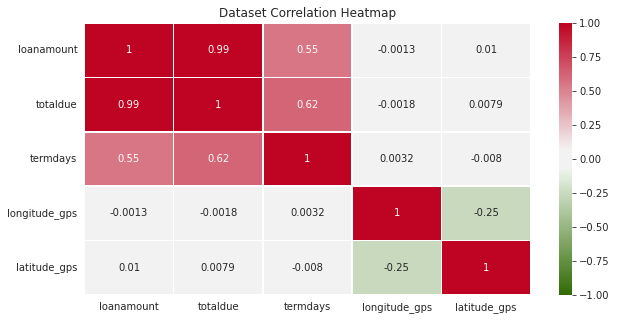



COVARIANCE MATRIX
                  loanamount      totaldue  ...  longitude_gps  latitude_gps
loanamount     1.153918e+08  1.274164e+08  ...    -110.676598    351.352890
totaldue       1.274164e+08  1.423086e+08  ...    -166.802134    306.162404
termdays       6.752983e+04  8.454043e+04  ...       0.289317     -0.298350
longitude_gps -1.106766e+02 -1.668021e+02  ...      62.672963     -6.553162
latitude_gps   3.513529e+02  3.061624e+02  ...      -6.553162     10.684782

[5 rows x 5 columns]





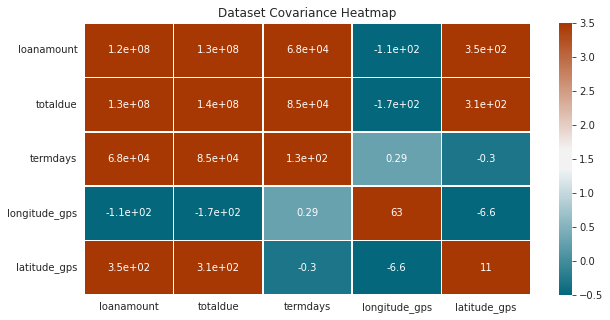

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",result.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((result).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",result.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((result).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

#**Encoding**

In [ ]:
# Encode categorical target variable 
good_bad_flag_mapping = {'Good': 1,
                         'Bad' : 0}
result['good_bad_flag'] = result['good_bad_flag'].map(good_bad_flag_mapping)
print('Label-encoded good_bad_flag:\n',result['good_bad_flag'],"\n\n")

Label-encoded good_bad_flag:
 0       1
1       1
2       1
3       1
4       1
       ..
3272    0
3273    0
3274    0
3275    0
3276    0
Name: good_bad_flag, Length: 3277, dtype: int64 




1    2563
0     714
Name: good_bad_flag, dtype: int64

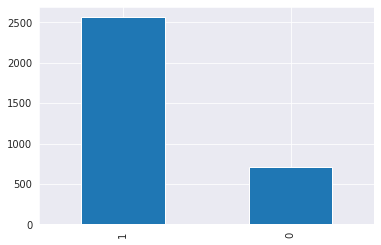

In [ ]:
# Count good and bad 
result["good_bad_flag"].value_counts().plot.bar()
result["good_bad_flag"].value_counts()

In [ ]:
# rename less frequent categories of bank_name_clients to 'Other'
need = result['bank_name_clients'].value_counts().index[:2]
result['bank_name_clients'] = np.where(result['bank_name_clients'].isin(need), result['bank_name_clients'], 'OTHER')

valCount = result['bank_name_clients'].value_counts()
print (valCount)

OTHER         1637
GT Bank       1210
First Bank     430
Name: bank_name_clients, dtype: int64


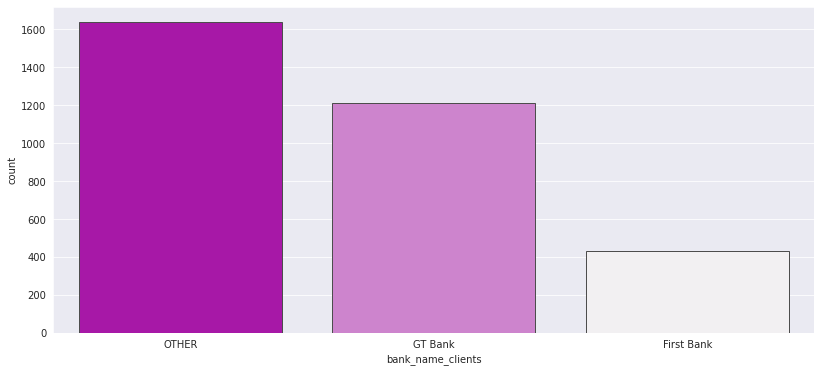

In [ ]:
# Univariate Bar Charts

plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
sns.countplot(  x="bank_name_clients", data=result,palette="light:m_r",
    edgecolor=".3")
plt.show()

In [ ]:
# rename less frequent categories of employment_status_clients to 'Other'
need = result['employment_status_clients'].value_counts().index[:3]
result['employment_status_clients'] = np.where(result['employment_status_clients'].isin(need), result['employment_status_clients'], 'OTHER')

valCount = result['employment_status_clients'].value_counts()
print (valCount)

Permanent        2348
OTHER             541
Self-Employed     277
Student           111
Name: employment_status_clients, dtype: int64


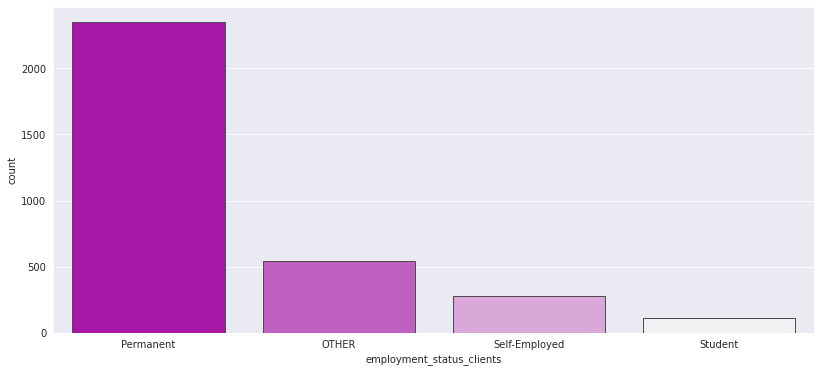

In [ ]:
# Univariate Bar Charts

plt.figure(figsize = (30,6))
plt.subplot(1,2,2)
sns.countplot(  x="employment_status_clients", data=result,palette="light:m_r",
    edgecolor=".3")
plt.show()

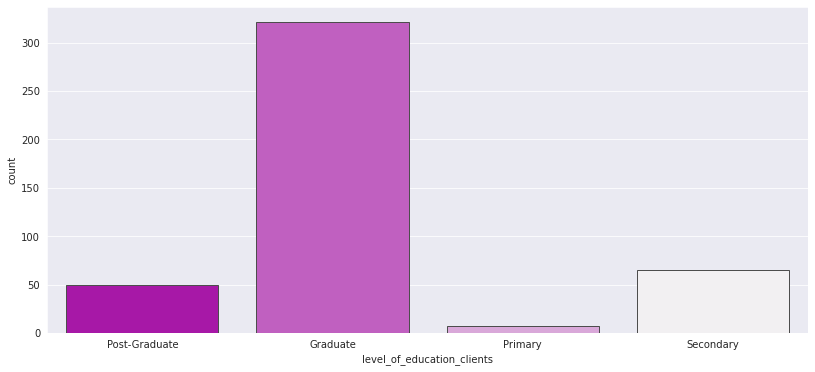

In [ ]:
# Univariate Bar Charts

plt.figure(figsize = (30,6))
plt.subplot(1,2,2)
sns.countplot(  x="level_of_education_clients", data=result,palette="light:m_r",
    edgecolor=".3")
plt.show()

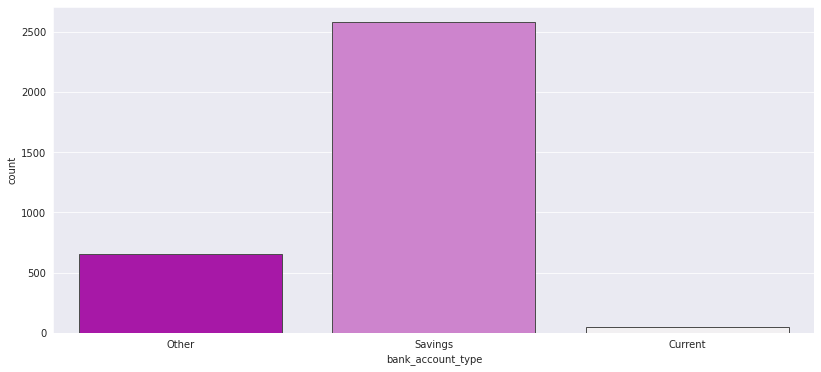

In [ ]:
# Univariate Bar Charts

plt.figure(figsize = (30,6))
plt.subplot(1,2,2)
sns.countplot(  x="bank_account_type", data=result,palette="light:m_r",
    edgecolor=".3")
plt.show()

In [ ]:
# change birthday to age. New column age is created
import pandas as pd
from datetime import datetime, date

  
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d %H:%M:%S.%f').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
result['Age'] = result['birthdate'].apply(age)
  
display(result)

,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
0,30000.0,34500.0,30,1,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,OTHER,Permanent,Post-Graduate,50
1,15000.0,17250.0,30,1,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,36
2,20000.0,22250.0,15,1,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,OTHER,Permanent,NaN,37
3,10000.0,11500.0,15,1,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,Permanent,NaN,44
4,40000.0,44000.0,30,1,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,Permanent,Primary,35
...,...,...,...,...,...,...,...,...,...,...,...,...
3272,10000.0,11500.0,15,0,1979-03-22 00:00:00.000000,Savings,3.302387,6.568690,GT Bank,OTHER,NaN,42
3273,10000.0,13000.0,30,0,1989-12-04 00:00:00.000000,Savings,4.607358,8.460608,OTHER,Permanent,NaN,32
3274,10000.0,11500.0,15,0,1989-11-21 00:00:00.000000,Savings,3.976842,7.409129,First Bank,Permanent,NaN,32
3275,10000.0,13000.0,30,0,1990-06-11 00:00:00.000000,Savings,3.986089,7.386796,OTHER,Permanent,NaN,31


In [ ]:
# drop birthday
result = result.drop(columns=['birthdate'])

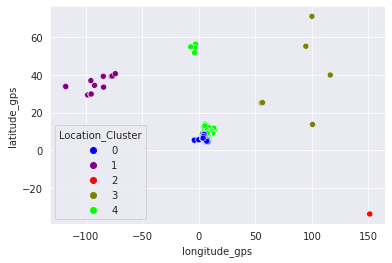

In [ ]:
# k-means clustering to cluster longitude and latitude 
# define the model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
# fit the model
model.fit(result[['longitude_gps','latitude_gps']])
# assign a cluster to each example
yhat = pd.DataFrame(model.predict(result[['longitude_gps','latitude_gps']]),columns=['Location_Cluster'])
if 'Location_Cluster' not in result:
  result = pd.concat([result.set_index(yhat.index),yhat],axis=1)
else:
  result['Location_Cluster'] = yhat
colors = ['#747FE3', '#8EE35D', '#E37346']
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(x='longitude_gps', y='latitude_gps', data=result, hue='Location_Cluster', palette = "brg")


In [ ]:
# create dummy variables for categorical variables 
result = pd.get_dummies(data=result, columns=['bank_name_clients','employment_status_clients','bank_account_type','level_of_education_clients'])

In [ ]:
# drop latitude & longitude
result = result.drop(columns=['longitude_gps','latitude_gps'])

In [ ]:
# Review columns in dataframe
result.columns

Index(['loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'Age',
       'Location_Cluster', 'bank_name_clients_First Bank',
       'bank_name_clients_GT Bank', 'bank_name_clients_OTHER',
       'employment_status_clients_OTHER',
       'employment_status_clients_Permanent',
       'employment_status_clients_Self-Employed',
       'employment_status_clients_Student', 'bank_account_type_Current',
       'bank_account_type_Other', 'bank_account_type_Savings',
       'level_of_education_clients_Graduate',
       'level_of_education_clients_Post-Graduate',
       'level_of_education_clients_Primary',
       'level_of_education_clients_Secondary'],
      dtype='object')

#**Visualizations**



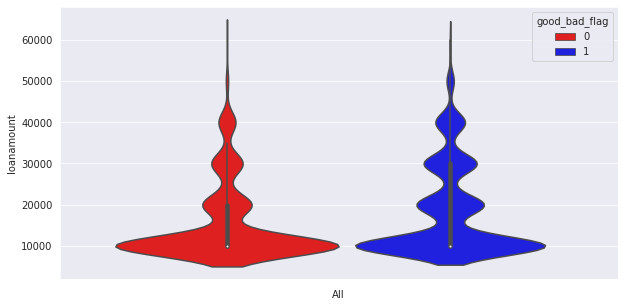

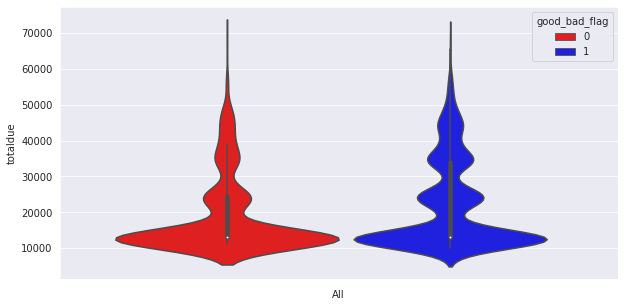

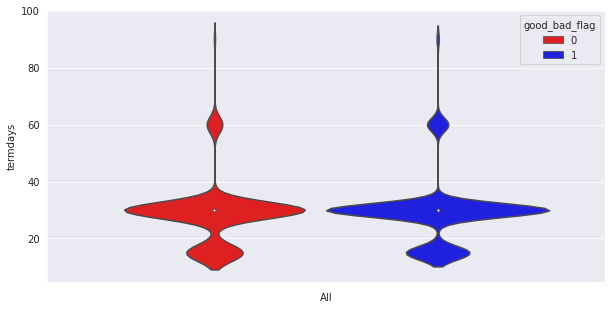

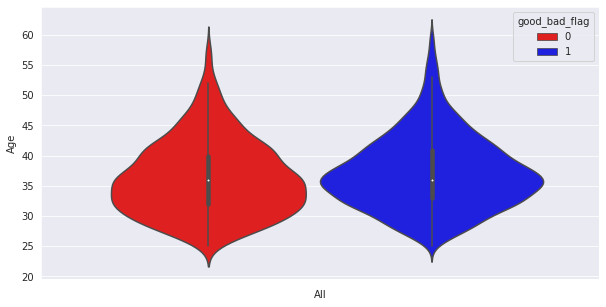

In [ ]:
# Violinplots for quant variables
result["All"] = ""
for i in result.columns:
  if (result.dtypes[i] == 'int64' or result.dtypes[i] == 'float64') and ((i != 'All') and (i != 'good_bad_flag')):
    plt.figure(figsize = (10,5))
    sns.violinplot(x = 'All',y = i, hue = "good_bad_flag", data = result,palette = {True:'blue', False:'red'})
    plt.show()
result.drop('All',axis=1)

result = result.drop(columns=['All'])

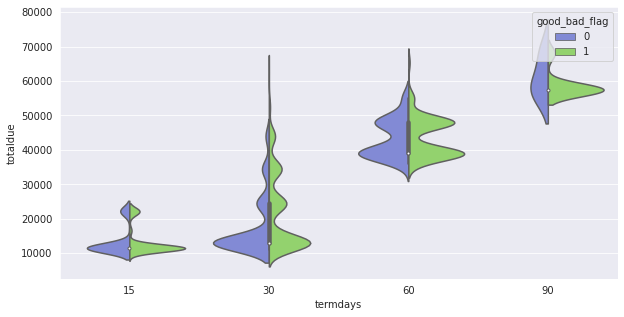

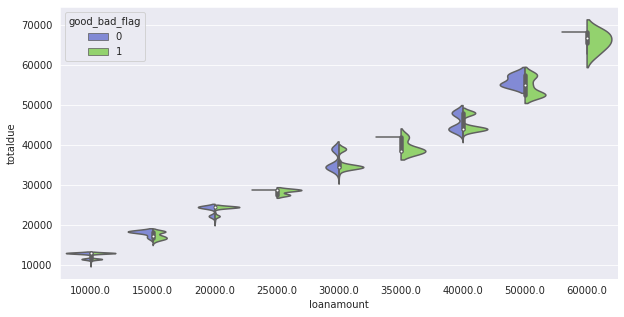

In [ ]:
# Bivariate violinplots
plt.figure(figsize = (10,5))
sns.violinplot(x ="termdays", y ="totaldue", hue ="good_bad_flag",data = result, split = True)
plt.show()
plt.figure(figsize = (10,5))
sns.violinplot(x ="loanamount", y ="totaldue", hue ="good_bad_flag",data = result, split = True)
plt.show()

# **Missing values & duplicates**

In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      result.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 loanamount                                  0
totaldue                                    0
termdays                                    0
good_bad_flag                               0
Age                                         0
Location_Cluster                            0
bank_name_clients_First Bank                0
bank_name_clients_GT Bank                   0
bank_name_clients_OTHER                     0
employment_status_clients_OTHER             0
employment_status_clients_Permanent         0
employment_status_clients_Self-Employed     0
employment_status_clients_Student           0
bank_account_type_Current                   0
bank_account_type_Other                     0
bank_account_type_Savings                   0
level_of_education_clients_Graduate         0
level_of_education_clients_Post-Graduate    0
level_of_education_clients_Primary          0
level_of_education_clients_Secondary        0
dtype: int64


In [ ]:
result.isnull().any()

loanamount                                  False
totaldue                                    False
termdays                                    False
good_bad_flag                               False
Age                                         False
Location_Cluster                            False
bank_name_clients_First Bank                False
bank_name_clients_GT Bank                   False
bank_name_clients_OTHER                     False
employment_status_clients_OTHER             False
employment_status_clients_Permanent         False
employment_status_clients_Self-Employed     False
employment_status_clients_Student           False
bank_account_type_Current                   False
bank_account_type_Other                     False
bank_account_type_Savings                   False
level_of_education_clients_Graduate         False
level_of_education_clients_Post-Graduate    False
level_of_education_clients_Primary          False
level_of_education_clients_Secondary        False


In [ ]:
# Check for duplicates and remove if there is any 
result.drop_duplicates(inplace = True)
print('\n Duplicates\n',result.duplicated().sum())


 Duplicates
 0


#**Pre-processing - Skewness correction**



In [ ]:
# pick numerical variables and set them as X
X = result[['loanamount','totaldue','termdays','Age']]

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'loanamount' . Skewness = 0.80


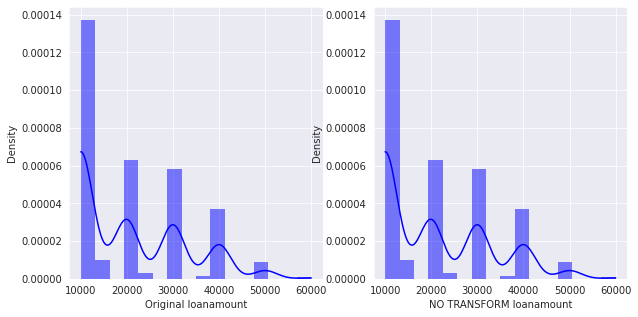


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'totaldue' . Skewness = 0.71


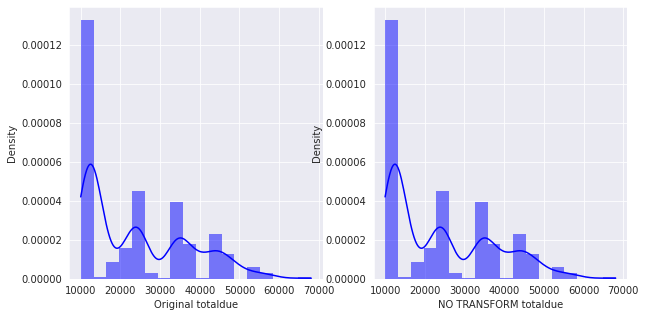


 ------------------------------------------------------

 'termdays' had 'positive' skewness of 1.69

 Transformation yielded skewness of -0.00


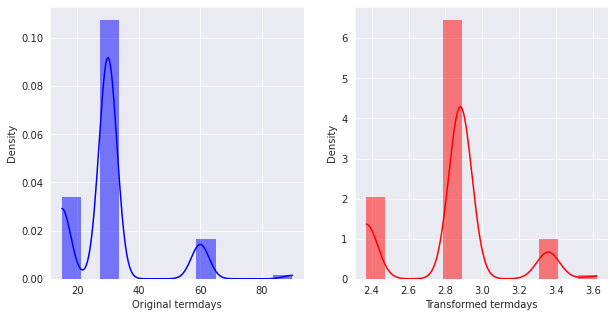


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Age' . Skewness = 0.63


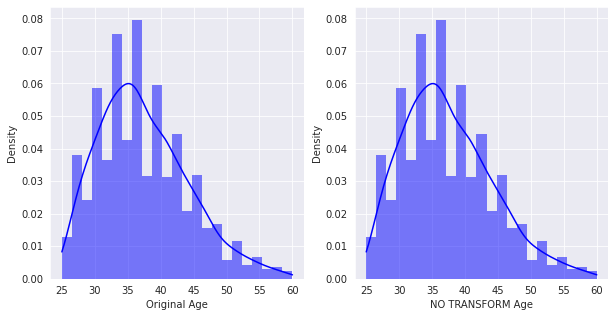

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

#**Pre-processing - Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())

Column  loanamount :  [709, 959, 984, 1393, 1496, 1802]
Column  totaldue :  [709, 959, 984, 1393, 1802]
Column  termdays :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 

In [ ]:
#Review columns
result.columns

Index(['loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'Age',
       'Location_Cluster', 'bank_name_clients_First Bank',
       'bank_name_clients_GT Bank', 'bank_name_clients_OTHER',
       'employment_status_clients_OTHER',
       'employment_status_clients_Permanent',
       'employment_status_clients_Self-Employed',
       'employment_status_clients_Student', 'bank_account_type_Current',
       'bank_account_type_Other', 'bank_account_type_Savings',
       'level_of_education_clients_Graduate',
       'level_of_education_clients_Post-Graduate',
       'level_of_education_clients_Primary',
       'level_of_education_clients_Secondary'],
      dtype='object')

In [ ]:
result.head()

,loanamount,totaldue,termdays,good_bad_flag,Age,Location_Cluster,bank_name_clients_First Bank,bank_name_clients_GT Bank,bank_name_clients_OTHER,employment_status_clients_OTHER,employment_status_clients_Permanent,employment_status_clients_Self-Employed,employment_status_clients_Student,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary
0,30000.0,34500.0,30,1,50,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,15000.0,17250.0,30,1,36,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
2,20000.0,22250.0,15,1,37,4,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,10000.0,11500.0,15,1,44,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,40000.0,44000.0,30,1,35,4,0,1,0,0,1,0,0,0,1,0,0,0,1,0


##Separating predictors and the target

In [ ]:
# Split data into predictors X and target y
X = result.drop(columns = ['good_bad_flag'])
y = result['good_bad_flag']

##Holdout Sample

In [ ]:
# Create holdout sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training Data Predictors\n',X_train.head(), '\nTraining Data Target\n',y_train.head(),'\n')
print('Test Data Predictors\n',X_test.head(), '\nTest Data Target\n',y_test.head())

Training Data Predictors
       loanamount  ...  level_of_education_clients_Secondary
1113     10000.0  ...                                     0
1993     20000.0  ...                                     0
2739     40000.0  ...                                     0
718      20000.0  ...                                     0
699      10000.0  ...                                     0

[5 rows x 19 columns] 
Training Data Target
 1113    0
1993    1
2739    1
718     0
699     1
Name: good_bad_flag, dtype: int64 

Test Data Predictors
       loanamount  ...  level_of_education_clients_Secondary
875      30000.0  ...                                     0
1335     40000.0  ...                                     0
689      10000.0  ...                                     0
752      10000.0  ...                                     0
3151     30000.0  ...                                     0

[5 rows x 19 columns] 
Test Data Target
 875     1
1335    1
689     1
752     1
3151    1
Name: go

## Standardization of predictor

In [ ]:
# Standardization of predictor
stdsc = StandardScaler()  
X_train_std = stdsc.fit_transform(X_train)   
X_test_std = stdsc.transform(X_test)             # transform uses the parameters from scaling the training data to transform our test data

Mean and Standard Deviation of sepal_width in Training Data:  1.0485873120844767e-16    1.0
Mean and Standard Deviation of sepal width in Test Data:  -0.0034530064829053947    0.9616602311448297


## Comparing Classifiers

In [ ]:
# Performance Measures - Unbalanced Data, Cross Validation, with a Pipeline
names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "Naive Bayes", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]

classifiers = [
    Perceptron(random_state=1),    
    LogisticRegression(),   
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data 
for name, clf in zip(names, classifiers):
  # Pipeline
  estimators = []
  estimators.append(('standardize', StandardScaler()))
  estimators.append(('classifier',clf))
  model = Pipeline(estimators)
  # Eval Pipeline
  kfold_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)
  scoring = ['accuracy','balanced_accuracy','precision','recall','f1','roc_auc']
  for sc in scoring:
    results = cross_val_score(model, X=X, y=y, cv=kfold_cv, scoring=sc)
    print('Classifier: %s Metric %s mean (std deviation): %.3f (%.3f)' % (name, sc, results.mean(), results.std()))

Classifier: Perceptron Metric accuracy mean (std deviation): 0.598 (0.015)
Classifier: Perceptron Metric balanced_accuracy mean (std deviation): 0.565 (0.031)
Classifier: Perceptron Metric precision mean (std deviation): 0.794 (0.022)
Classifier: Perceptron Metric recall mean (std deviation): 0.630 (0.037)
Classifier: Perceptron Metric f1 mean (std deviation): 0.701 (0.018)
Classifier: Perceptron Metric roc_auc mean (std deviation): 0.582 (0.027)
Classifier: Logistic Regression Metric accuracy mean (std deviation): 0.752 (0.001)
Classifier: Logistic Regression Metric balanced_accuracy mean (std deviation): 0.501 (0.001)
Classifier: Logistic Regression Metric precision mean (std deviation): 0.752 (0.001)
Classifier: Logistic Regression Metric recall mean (std deviation): 1.000 (0.000)
Classifier: Logistic Regression Metric f1 mean (std deviation): 0.858 (0.001)
Classifier: Logistic Regression Metric roc_auc mean (std deviation): 0.635 (0.018)
Classifier: SVM (RBF kernel) Metric accuracy

## Oversampling with SMOTE

In [ ]:
# SMOTE (oversampling)
# Data is unbalanced (38.54% converted instances)

import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12346)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print("Shape before SMOTE: ", X_train.shape, y_train.shape, "\n")
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape, "\n")

imblearn version:  0.8.1
Shape before SMOTE:  (1423, 19) (1423,) 

Shape after SMOTE:  (2134, 19) (2134,) 



In [ ]:
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()  
X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
X_test_std = stdsc.transform(X_test)

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)    #Selecting the top n features, from about 70, to improve model robustness.
_ = rfe.fit(X_train_SMOTE_std,y_train_SMOTE)
print('Important Features\n',X.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X_train_SMOTE_std), y_train_SMOTE)
print("\n Accuracy: ",rf.score(rfe.transform(X_test_std), y_test))

Important Features
 Index(['loanamount', 'totaldue', 'Age', 'Location_Cluster',
       'bank_name_clients_First Bank', 'bank_name_clients_GT Bank',
       'bank_name_clients_OTHER', 'employment_status_clients_OTHER',
       'employment_status_clients_Permanent', 'bank_account_type_Other'],
      dtype='object')

 Accuracy:  0.5689655172413793


In [ ]:
# Work with the set of predictors identified by RFE
best_predictors = rfe.support_              # identifies features used
new_features = []                           # X with selected features
for feature, predictor in list(zip(X, best_predictors)):
    if predictor == True:
        new_features.append(feature)

X = result[new_features]
X.shape

(2033, 10)

## Comparing Classifiers after SMOTE

In [ ]:
from numpy.random.mtrand import f
# Workflow standardizes, SMOTEs training set, fits a classifier, and reports metrics.
# SMOTE evidently doesn't have a 'fit_transform' method, so there's no way to incorporate it into an sklearn pipeline
# We'll consider an alternative - an imblearn pipeline in the gridsearch section

names = ["Perceptron", "Logistic Regression", "SVM (RBF kernel)", "Decision Tree", "Naive Bayes", "k Nearest Neighbors", "MLP", "Random Forest", "XG Boost", "Light GBM"]
classifiers = [
    Perceptron(random_state=1),    
    LogisticRegression(),   
    SVC(kernel="rbf", C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    KNeighborsClassifier(3),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50, learning_rate=0.1, bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)]

# Build each classifier using the unbalanced TRAINING data, show decision region and petrformance of the unbalanced TEST data 
no_folds = 5 # number of folds desired for cross validation
kf = StratifiedKFold(n_splits=no_folds, shuffle=True, random_state=12345)
for name, clf in zip(names, classifiers):
  print('CLASSIFIER: ',name,'\n')
  mean_accuracy = 0.0
  mean_balanced_accuracy = 0.0
  mean_auc = 0.0
  for fold, (train_index, test_index) in enumerate(kf.split(X,y),1):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)] 
    sm = SMOTE()
    X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
    stdsc = StandardScaler()  
    X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)   
    X_test_std = stdsc.transform(X_test)   
    clf.fit(X_train_SMOTE_std, y_train_SMOTE) 
    y_pred = clf.predict(X_test_std)
    print(f'For fold {fold}:')
    print(f'Accuracy: {clf.score(X_test_std, y_test)}')
    print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    print(f'AUC: {roc_auc_score(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    mean_accuracy = mean_accuracy + clf.score(X_test_std, y_test)
    mean_balanced_accuracy = mean_balanced_accuracy + balanced_accuracy_score(y_test, y_pred)
    mean_auc = mean_auc + roc_auc_score(y_test, y_pred)
  mean_accuracy = mean_accuracy / no_folds
  mean_balanced_accuracy = mean_balanced_accuracy / no_folds
  mean_auc = mean_auc / no_folds
  print('Average accuracy: %.3f Average balanced accuracy: %.3f Average AUC: %.3f\n\n' % (mean_accuracy, mean_balanced_accuracy, mean_auc))

CLASSIFIER:  Perceptron 

For fold 1:
Accuracy: 0.7199017199017199
Balanced Accuracy: 0.5749369054552514
AUC: 0.5749369054552514
Confusion Matrix: 
[[ 29  72]
 [ 42 264]]
For fold 2:
Accuracy: 0.6142506142506142
Balanced Accuracy: 0.5212580081537566
AUC: 0.5212580081537566
Confusion Matrix: 
[[ 34  67]
 [ 90 216]]
For fold 3:
Accuracy: 0.6363636363636364
Balanced Accuracy: 0.5392803986280981
AUC: 0.5392803986280981
Confusion Matrix: 
[[ 35  66]
 [ 82 224]]
For fold 4:
Accuracy: 0.5665024630541872
Balanced Accuracy: 0.6022074338581399
AUC: 0.6022074338581399
Confusion Matrix: 
[[ 68  33]
 [143 162]]
For fold 5:
Accuracy: 0.5443349753694581
Balanced Accuracy: 0.541097224476546
AUC: 0.541097224476546
Confusion Matrix: 
[[ 54  47]
 [138 167]]
Average accuracy: 0.616 Average balanced accuracy: 0.556 Average AUC: 0.556


CLASSIFIER:  Logistic Regression 

For fold 1:
Accuracy: 0.6756756756756757
Balanced Accuracy: 0.5156765676567657
AUC: 0.5156765676567656
Confusion Matrix: 
[[ 20  81]
 [ 51

##Hyper parameter tuning for Random Forest

In [ ]:
# There are likely a number of classifiers in the Rashomon Set
# We'll pick the random forest model and optimiz the hyperparameters

RF_params = {'criterion':['gini','entropy'],'max_depth':[7,10,15],'class_weight':[{0:0.1, 1:0.9}, {0:0.15, 1:0.85}, {0:0.2, 1:0.8}, {0:0.25, 1:0.75}]}
clf = GridSearchCV(RandomForestClassifier(oob_score=True), RF_params, cv=3,scoring='roc_auc')
clf.fit(X_train_SMOTE_std, np.ravel(y_train_SMOTE))
y_pred = clf.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))
print(clf.best_params_, clf.best_score_)
print("Accuracy = ",accuracy_score(y_test, y_pred))
print("Auc = ",roc_auc_score(y_test, y_pred))

[[  5  96]
 [ 22 283]]
{'class_weight': {0: 0.25, 1: 0.75}, 'criterion': 'entropy', 'max_depth': 10} 0.8090363114963028
Accuracy =  0.7093596059113301
Auc =  0.488686901477033


#**Conclusion**
## BLUF

Our main objective is to make sure that we give loans to the right people while minimizing the loans to people who would not settle loan on time. 

After cleaning and partitioning the data set, we use SMOTE to oversample the data since the data is unbalanced. Then, we standardize the z-score, and we perform RFE to find out the 10 most important features. We run the data through several machine learning tools to find out the best classifier. We used accuracy and AUC as our metrics, and we also looked at the confusion matrix to minimize the false positives. In the end, after performing grid search random forest performed the best, giving us an accuracy of 71% and AUC of 49%. We got 283 true positives on our test data, which outweighs the 96 false positives.

We believe this data is not very useful in predicting the loan defaulters due to the high numbers of false positives. Adding more data points or more correlated feature may help on improving the accuracy. 
